In [1]:
import pandas as pd
from datetime import date, timedelta
import win32com.client as win32
import teradatasql
import seaborn as sns
from phik.report import plot_correlation_matrix
from phik import report
import matplotlib.pyplot as plt
import pygwalker as pyg
import folium 
from folium.plugins import MarkerCluster, HeatMap
import requests
from xml.etree import ElementTree
import numpy as np

c:\Users\vitaly.flerin\Miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\vitaly.flerin\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
c:\Users\vitaly.flerin\Miniconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
user="vitaly.flerin"
password="4GyyERMq!!!"
query = '''select * from uat_ca.vf_rostov_research_12072023_hwe_all'''

In [3]:
with teradatasql.connect(host="td2800.corp.tele2.ru", user=user, password=password,logmech="ldap", tmode="TERA" ) as connect:
    df = pd.read_sql(query, connect)
df

C:\Users\vitaly.flerin\AppData\Local\Temp\ipykernel_10160\4148601419.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connect)


,hwe_sector,subs_id,sector_name,BS_POSITION,coeff_80,top_3,coeff_80_new,LON,LAT,ST_POINT,REPORT_DATE,HOME_SECTOR,WORK_SECTOR,MAXDATA_SECTOR,subs_id_hwe
0,RO0320_012,12888958.0,RO0320_015,POINT (39.620949 47.232759),0.010956,2,1.09560199136861E-002,39.620949,47.232759,POINT (39.620949 47.232759),2023-03-01,RO0320_2,RO0320_2,RO0320_2,12888958.0
1,RO3854_1,55547641.0,RO3854_4,POINT (41.034444 47.975),0.004399,2,4.39901141220938E-003,41.034444,47.975000,POINT (41.034444 47.975),2023-03-01,RO0854_1,RO0854_1,RO0854_1,55547641.0
2,RO0046_013,49028625.0,RO0046_016,POINT (39.811944 47.237333),0.007338,3,7.33773998945939E-003,39.811944,47.237333,POINT (39.811944 47.237333),2023-03-01,RO0337_1,RO0046_3,RO0337_1,49028625.0
3,RO3540_2,33686957.0,RO3540_2,POINT (40.084222 47.406389),0.005696,3,5.69560514303939E-003,40.084222,47.406389,POINT (40.084222 47.406389),2023-03-01,RO0540_2,RO0540_2,RO0540_2,33686957.0
4,RO1089_1,36561037.0,RO1089_1,POINT (39.645492 47.215147),0.024185,3,2.41853015635909E-002,39.645492,47.215147,POINT (39.645492 47.215147),2023-03-01,RO4089_1,RO3075_3,RO4089_1,36561037.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794630,RO4543_2,32716351.0,RO4543_2,POINT (39.723306 47.1475),0.018510,2,1.85097634600694E-002,39.723306,47.147500,POINT (39.723306 47.1475),2023-03-01,RO0100_1,RO0100_012,RO0100_012,32716351.0
794631,RO4287_2,45026717.0,RO4287_5,POINT (39.690559 47.25988),0.006109,2,6.10909210007098E-003,39.690559,47.259880,POINT (39.690559 47.25988),2023-03-01,RO0046_013,RO0046_013,RO0072_2,45026717.0
794632,RO0399_3,52872004.0,RO0399_013,POINT (39.619909 47.21626),0.001092,3,1.09191249978752E-003,39.619909,47.216260,POINT (39.619909 47.21626),2023-03-01,RO0399_013,RO0399_3,RO0399_3,52872004.0
794633,RO3399_3,52872004.0,RO3399_6,POINT (39.619909 47.21626),0.003220,1,3.21959739247792E-003,39.619909,47.216260,POINT (39.619909 47.21626),2023-03-01,RO0399_013,RO0399_3,RO0399_3,52872004.0


ф-я на добавление флага для домашнего, раб и макс


In [91]:
df_hwe_copy = df.copy()
def flag_hwe(row):
    if row['hwe_sector'] == row['HOME_SECTOR']:
        return "1"
    else:
        return "0"
def flag_max(row):
    if row['hwe_sector'] == row['MAXDATA_SECTOR']:
        return "1"
    else:
        return "0"
def flag_work(row):
    if row['hwe_sector'] == row['WORK_SECTOR']:
        return "1"
    else:
        return "0"
df_hwe_copy['flag_hwe'] = df_hwe_copy.apply(flag_hwe,axis =1)
df_hwe_copy['flag_max'] = df_hwe_copy.apply(flag_max,axis =1)
df_hwe_copy['flag_work'] = df_hwe_copy.apply(flag_work,axis =1)


In [92]:
df_hwe_copy.sort_values(by = 'subs_id').head(4)

,hwe_sector,subs_id,sector_name,BS_POSITION,coeff_80,top_3,coeff_80_new,LON,LAT,ST_POINT,REPORT_DATE,HOME_SECTOR,WORK_SECTOR,MAXDATA_SECTOR,subs_id_hwe,flag_hwe,flag_max,flag_work
206838,RO0122_3,158686.0,RO0122_013,POINT (39.614872 47.21215),0.015251,2,1.52511322106885E-002,39.614872,47.212150,POINT (39.614872 47.21215),2023-03-01,RO0122_013,RO0092_3,RO0122_3,158686.0,0,1,0
207686,RO0122_013,158686.0,RO0122_016,POINT (39.614872 47.21215),0.189544,1,1.89543766540174E-001,39.614872,47.212150,POINT (39.614872 47.21215),2023-03-01,RO0122_013,RO0092_3,RO0122_3,158686.0,1,0,0
208534,RO0092_013,158686.0,RO0092_016,POINT (39.688139 47.271611),0.003162,3,3.16216533545441E-003,39.688139,47.271611,POINT (39.688139 47.271611),2023-03-01,RO0122_013,RO0092_3,RO0122_3,158686.0,0,0,0
279045,RO0821_1,158752.0,RO0821_1,POINT (39.78888 47.346406),0.036673,2,3.66731802519392E-002,39.788880,47.346406,POINT (39.78888 47.346406),2023-03-01,RO3821_1,RO3821_1,RO4025_1,158752.0,0,0,0


In [93]:
print(f'Общее количество уникальных детракторов в витрине: {df_hwe_copy.subs_id_hwe.nunique()}') # уникальных абонов

Общее количество уникальных детракторов в витрине: 269740


In [94]:
print(f'Распределение по ХВЕ витрине:')  # уникальных абонов
print(df_hwe_copy[df_hwe_copy['flag_hwe'] == "1"].subs_id.nunique())  # уникальных абонов, у которых место жительства совпадает с плохим сектором из топ 3
print(df_hwe_copy[df_hwe_copy['flag_max'] == "1"].subs_id.nunique())
print(df_hwe_copy[df_hwe_copy['flag_work'] == "1"].subs_id.nunique())

Распределение по ХВЕ витрине:
175352
169456
175085


In [95]:
def flg(row):
    if row['flag_hwe'] =='1' and row['flag_max'] =='1' and row['flag_work'] == '1':
        return '1'
    else:
        return '0'


In [97]:
df_hwe_copy['flag'] = df_hwe_copy.apply(flg, axis = 1)
df_hwe_copy

,hwe_sector,subs_id,sector_name,BS_POSITION,coeff_80,top_3,coeff_80_new,LON,LAT,ST_POINT,REPORT_DATE,HOME_SECTOR,WORK_SECTOR,MAXDATA_SECTOR,subs_id_hwe,flag_hwe,flag_max,flag_work,row_number,flag
0,RO0320_012,12888958.0,RO0320_015,POINT (39.620949 47.232759),0.010956,2,1.09560199136861E-002,39.620949,47.232759,POINT (39.620949 47.232759),2023-03-01,RO0320_2,RO0320_2,RO0320_2,12888958.0,0,0,0,1,0
1,RO3854_1,55547641.0,RO3854_4,POINT (41.034444 47.975),0.004399,2,4.39901141220938E-003,41.034444,47.975000,POINT (41.034444 47.975),2023-03-01,RO0854_1,RO0854_1,RO0854_1,55547641.0,0,0,0,1,0
2,RO0046_013,49028625.0,RO0046_016,POINT (39.811944 47.237333),0.007338,3,7.33773998945939E-003,39.811944,47.237333,POINT (39.811944 47.237333),2023-03-01,RO0337_1,RO0046_3,RO0337_1,49028625.0,0,0,0,1,0
3,RO3540_2,33686957.0,RO3540_2,POINT (40.084222 47.406389),0.005696,3,5.69560514303939E-003,40.084222,47.406389,POINT (40.084222 47.406389),2023-03-01,RO0540_2,RO0540_2,RO0540_2,33686957.0,0,0,0,1,0
4,RO1089_1,36561037.0,RO1089_1,POINT (39.645492 47.215147),0.024185,3,2.41853015635909E-002,39.645492,47.215147,POINT (39.645492 47.215147),2023-03-01,RO4089_1,RO3075_3,RO4089_1,36561037.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794630,RO4543_2,32716351.0,RO4543_2,POINT (39.723306 47.1475),0.018510,2,1.85097634600694E-002,39.723306,47.147500,POINT (39.723306 47.1475),2023-03-01,RO0100_1,RO0100_012,RO0100_012,32716351.0,0,0,0,3,0
794631,RO4287_2,45026717.0,RO4287_5,POINT (39.690559 47.25988),0.006109,2,6.10909210007098E-003,39.690559,47.259880,POINT (39.690559 47.25988),2023-03-01,RO0046_013,RO0046_013,RO0072_2,45026717.0,0,0,0,3,0
794632,RO0399_3,52872004.0,RO0399_013,POINT (39.619909 47.21626),0.001092,3,1.09191249978752E-003,39.619909,47.216260,POINT (39.619909 47.21626),2023-03-01,RO0399_013,RO0399_3,RO0399_3,52872004.0,0,1,1,1,0
794633,RO3399_3,52872004.0,RO3399_6,POINT (39.619909 47.21626),0.003220,1,3.21959739247792E-003,39.619909,47.216260,POINT (39.619909 47.21626),2023-03-01,RO0399_013,RO0399_3,RO0399_3,52872004.0,0,0,0,2,0


In [98]:
# Пронумеровать строки в каждой группе
df_hwe_copy['row_number'] = df_hwe_copy.groupby('subs_id').cumcount() + 1
df_hwe_copy.sort_values(by ='subs_id').query('flag == "1" ')


,hwe_sector,subs_id,sector_name,BS_POSITION,coeff_80,top_3,coeff_80_new,LON,LAT,ST_POINT,REPORT_DATE,HOME_SECTOR,WORK_SECTOR,MAXDATA_SECTOR,subs_id_hwe,flag_hwe,flag_max,flag_work,row_number,flag
767426,RO3191_1,158814.0,RO3191_7,POINT (39.7175 47.223194),0.035938,2,3.59383525413260E-002,39.717500,47.223194,POINT (39.7175 47.223194),2023-03-01,RO3191_1,RO3191_1,RO3191_1,158814.0,1,1,1,2,1
766895,RO3191_1,158814.0,RO3191_1,POINT (39.7175 47.223194),0.147708,1,1.47707861959985E-001,39.717500,47.223194,POINT (39.7175 47.223194),2023-03-01,RO3191_1,RO3191_1,RO3191_1,158814.0,1,1,1,1,1
404246,RO0320_2,159917.0,RO0320_012,POINT (39.620949 47.232759),0.009625,3,9.62510172848296E-003,39.620949,47.232759,POINT (39.620949 47.232759),2023-03-01,RO0320_2,RO0320_2,RO0320_2,159917.0,1,1,1,3,1
184211,RO0165_1,159940.0,RO0165_011,POINT (39.628583 47.234222),0.006012,2,6.01186007206423E-003,39.628583,47.234222,POINT (39.628583 47.234222),2023-03-01,RO0165_1,RO0165_1,RO0165_1,159940.0,1,1,1,2,1
149807,RO4476_1,162112.0,RO4476_1,POINT (39.63022 47.226123),0.026278,1,2.62783089442009E-002,39.630220,47.226123,POINT (39.63022 47.226123),2023-03-01,RO4476_1,RO4476_1,RO4476_1,162112.0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530931,RO0553_3,72789769.0,RO0553_013,POINT (40.055972 47.943139),0.000000,1,not_bad_coeff,40.055972,47.943139,POINT (40.055972 47.943139),2023-03-01,RO0553_3,RO0553_3,RO0553_3,72789769.0,1,1,1,1,1
318739,RO2196_2,72790096.0,RO2196_082,POINT (41.516437 46.463025),0.441255,1,4.41254887951142E-001,41.516437,46.463025,POINT (41.516437 46.463025),2023-03-01,RO2196_2,RO2196_2,RO2196_2,72790096.0,1,1,1,3,1
317891,RO2196_2,72790096.0,RO2196_012,POINT (41.516437 46.463025),0.040958,2,4.09584893423408E-002,41.516437,46.463025,POINT (41.516437 46.463025),2023-03-01,RO2196_2,RO2196_2,RO2196_2,72790096.0,1,1,1,2,1
124209,RO0735_3,72790491.0,RO0735_3,POINT (40.703917 47.425611),0.002615,3,2.61469484006911E-003,40.703917,47.425611,POINT (40.703917 47.425611),2023-03-01,RO0735_3,RO0735_3,RO0735_3,72790491.0,1,1,1,1,1


In [88]:
df_hwe_copy.sort_values(by ='subs_id').query('flag == "1" ').duplicated().sum()

0

ДОЛЯ СОВПАДЕНИЯ ВСЕХ ФЛАГОВ НА ОДНОЙ БС

In [99]:
print("Всего абонов у которых совпадают все сектора:", df_hwe_copy[df_hwe_copy['flag'] == "1"].subs_id.nunique()) 
#print ("Доля:",df_hwe_copy[df_hwe_copy['flag'] == "1"].subs_id.nunique() / df_hwe_copy.subs_id.nunique() )


Всего абонов у которых совпадают все сектора: 92982


In [19]:
#df_hwe_copy.to_excel('qwe.xlsx')

c:\Users\vitaly.flerin\Miniconda3\lib\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


<Axes: xlabel='LON', ylabel='LAT'>

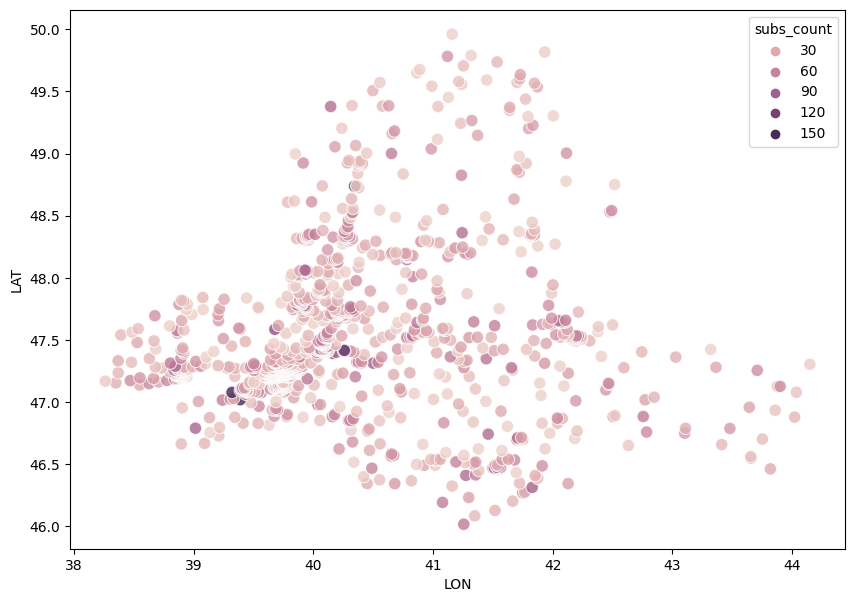

In [101]:
# Создаем датафрейм для распределения 
df_subs_count = df_hwe_copy.query('flag == "1" & row_number ==1 ').groupby(['LAT', 'LON', 'ST_POINT'], as_index=False)['subs_id'].count()
df_subs_count = df_subs_count.rename(columns={'subs_id': 'subs_count'})

# Создаем scatterplot
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_subs_count, x='LON', y='LAT', hue='subs_count', cmap='cool', s=80, alpha=0.8)

In [102]:
df_subs_count.sort_values(by='subs_count', ascending=False ) # распределение

,LAT,LON,ST_POINT,subs_count
838,47.487181,40.098150,POINT (40.09815 47.487181),167
167,47.076833,39.320361,POINT (39.320361 47.076833),154
154,47.018389,39.388778,POINT (39.388778 47.018389),153
831,47.483194,40.091778,POINT (40.091778 47.483194),152
771,47.415222,40.258472,POINT (40.258472 47.415222),135
...,...,...,...,...
1203,48.371372,41.718290,POINT (41.71829 48.371372),1
940,47.640113,40.706946,POINT (40.706946 47.640113),1
1165,48.300118,41.411161,POINT (41.411161 48.300118),1
1070,47.884742,41.051643,POINT (41.051643 47.884742),1


<Axes: >

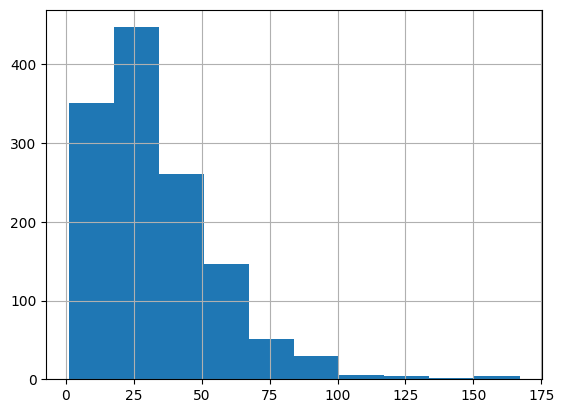

In [103]:
df_subs_count.subs_count.hist()

In [104]:
#находим выбросы
Q1 = df_subs_count["subs_count"].quantile(0.25)
Q3 = df_subs_count["subs_count"].quantile(0.75)
IQR = Q3 - Q1

# Определение границ выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Нахождение выбросов
outliers = df_subs_count[(df_subs_count['subs_count'] < lower_bound) | (df_subs_count['subs_count'] > upper_bound)]
outliers.subs_count.sort_values(ascending=True).head(5)

862    85
81     85
811    85
768    86
643    86
Name: subs_count, dtype: int64

In [119]:
#добавляем интерактив
# Создаем датафрейм для распределения подписчиков по регионам
df_subs_count = df_hwe_copy.query('flag == "1" & row_number ==1 ').groupby(['LAT', 'LON', 'ST_POINT'], as_index=False)['subs_id'].count()
df_subs_count = df_subs_count.rename(columns={'subs_id': 'subs_count'})
# Создаем карту
m = folium.Map(location=[df_subs_count['LAT'].mean(), df_subs_count['LON'].mean()], zoom_start=5)
# Создаем точечные маркеры для каждой точки и добавляем их на карту
for i, row in df_subs_count.iterrows():
    if row['subs_count'] >= 125:
        color = 'red'
    elif row['subs_count'] > 75 and row['subs_count'] < 125:
        color = 'blue'
    else:
        color = 'green'
    folium.CircleMarker(
        location=[row['LAT'], row['LON']],
        radius=row['subs_count']/12,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        #tooltip=str([row['subs_count'], row ['ST_POINT']])
        tooltip="кол-во детракторов: " + str(row['subs_count']) + ", " +"BS_position: "+ str(row['ST_POINT'])
    ).add_to(m)
m.save("HWE.html")

In [ ]:
#добавляем интерактив
# Создаем датафрейм для распределения подписчиков по регионам
df_subs_count = df_hwe_copy.query('flag_hwe == "1"').groupby(['LAT', 'LON', 'ST_POINT'], as_index=False)['subs_id'].count()
df_subs_count = df_subs_count.rename(columns={'subs_id': 'subs_count'})
# Создаем карту
m = folium.Map(location=[df_subs_count['LAT'].mean(), df_subs_count['LON'].mean()], zoom_start=5)
# Создаем точечные маркеры для каждой точки и добавляем их на карту
for i, row in df_subs_count.iterrows():
    if row['subs_count'] >= 72:
        color = 'red'
    elif row['subs_count'] > 45 and row['subs_count'] < 72:
        color = 'blue'
    else:
        color = 'green'
    folium.CircleMarker(
        location=[row['LAT'], row['LON']],
        radius=row['subs_count']/19,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        tooltip=str(row['subs_count'])
    ).add_to(m)
m#.save("HWE.html")

In [ ]:
# создаем список координат из df 
#Это строка кода создает список координат в формате, удобном для работы с модулем folium. 
# Она берет значения столбцов 'LAT' и 'LON' из датафрейма df и формирует список кортежей, содержащих значения этих столбцов. 
# Вот как это работает:df[['LAT', 'LON']] - выбираются столбцы 'LAT' и 'LON' из датафрейма df.values - преобразует эти столбцы в массив numpy.tolist() - преобразует массив numpy в список кортежей
locationlist = df[['LAT', 'LON']].values.tolist()

#итоговый вывод результата
#location - это определяет начальное местоположение карты. Здесь мы устанавливаем координаты [55.62252, 37.30162], что примерно соответствует городу Москва.
#tiles - это определяет тему карты. Мы выбрали тему 'CartoDB dark_matter', которая показывает карту в темной гамме.
#zoom_start - это задает начальный масштаб карты.
#Далее мы создаем объект marker_cluster - кластер маркеров для группировки сгенерированных маркеров на карте.
map3 = folium.Map(location=[47.222078, 39.720358], tiles='CartoDB dark_matter', zoom_start=8)
marker_cluster = MarkerCluster().add_to(map3)
# создаем маркеры на карте 
#Этот блок кода генерирует маркеры для каждой точки в списке координат locationlist и добавляет их в marker_cluster.
#Цикл for перебирает элементы locationlist - набор кортежей с координатами LAT и LON. 
# Для каждой точки мы создаем текстовое содержимое маркера (поле 'subs_id' из датафрейма df). 
# Затем мы добавляем маркер на карту используя folium.Marker. 
# В качестве аргументов этой функции мы передаем locationlist, координаты каждой точки, текстовое содержимое маркера (popup_text) и опции иконки маркера (icon).
# Мы добавляем каждый маркер в кластер marker_cluster с помощью метода .add_to().
#for point in range(0, min(len(locationlist), 1000)):
for point in range(len(locationlist)):
     # задаем текстовое содержимое маркера
    popup_text = f"ID:{df['subs_id'][point]}"
       # создаем маркер и добавляем его на карту
    folium.Marker(locationlist[point], popup=popup_text, icon=folium.Icon(icon='male', angle=0, prefix='fa')).add_to(marker_cluster)  
# выводим карту
map3#.save("map.html")

Для нахождения выбросов в столбце subs_id с помощью машинного обучения можно использовать алгоритмы аномалийного обнаружения, такие как One-Class SVM или Isolation Forest.

Пример кода для поиска выбросов с помощью One-Class SVM:

In [ ]:
#Пример кода для поиска выбросов с помощью Isolation Forest:
import pandas as pd
from sklearn.ensemble import IsolationForest
# Инициализация алгоритма Isolation Forest
clf = IsolationForest(n_estimators=100, contamination=0.05)
# Обучение алгоритма на данных
clf.fit(df_subs_count[['subs_count']])
# Определение, является ли каждое наблюдение выбросом (1) или нет (-1)
preds = clf.predict(df_subs_count[['subs_count']])
# Фильтрация выбросов
outliers = df_subs_count[preds == -1]
print(outliers)

In [ ]:
import pandas as pd
from sklearn.svm import OneClassSVM
# Инициализация алгоритма One-Class SVM
clf = OneClassSVM(kernel='rbf', nu=0.05)
# Обучение алгоритма на данных
clf.fit(df_subs_count[['subs_count']])
# Определение, является ли каждое наблюдение выбросом (1) или нет (-1)
preds = clf.predict(df_subs_count[['subs_count']])
# Фильтрация выбросов
outliers = df_subs_count[preds == -1]
print(outliers)